In [1]:
!pip install seaborn

In [2]:
import sklearn
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
print(sklearn.__version__)
print(pd.__version__)
print(np.__version__)


1.5.1
2.2.2
2.0.1


## Lets load the Diabetes dataset

In [4]:
diabetes = datasets.load_diabetes()

In [5]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [6]:
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

## Preparing The Dataset

In [7]:
df = pd.DataFrame(X, columns=feature_names)
df['Progression'] = y

In [8]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [9]:
df = df.drop(["sex"], axis=1)
df.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   bmi          442 non-null    float64
 2   bp           442 non-null    float64
 3   s1           442 non-null    float64
 4   s2           442 non-null    float64
 5   s3           442 non-null    float64
 6   s4           442 non-null    float64
 7   s5           442 non-null    float64
 8   s6           442 non-null    float64
 9   Progression  442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [11]:
## Check the missing Values
df.isnull().sum()

age            0
bmi            0
bp             0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
Progression    0
dtype: int64

## Train Test Split


In [12]:
X = df.drop('Progression', axis=1)
y = df['Progression']  

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [15]:
X_train=scaler.fit_transform(X_train)

In [16]:
X_test=scaler.transform(X_test)

## Model Training

In [17]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()

In [18]:
regression.fit(X_train, y_train)

LinearRegression()

In [19]:
## print the coefficients and the intercept
print(regression.coef_)

[ -0.03997084  28.50394622  16.44279367 -39.33388097  22.59977214
   6.51661189   8.78840068  32.34601591   1.65526226]


In [20]:
print(regression.intercept_)

153.90291262135923


In [21]:
### Prediction With Test Data
pred = regression.predict(X_test)

## Assumptions

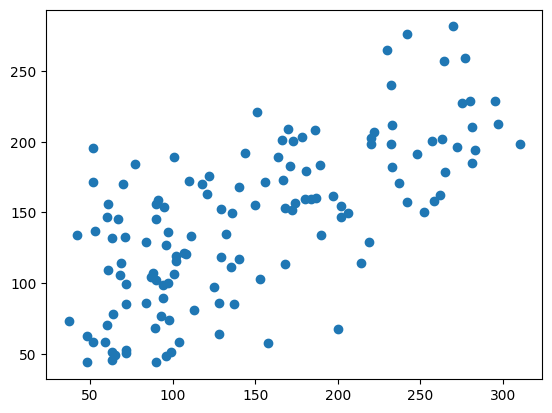

In [26]:
## plot a scatter plot for the prediction
plt.scatter(y_test, pred)

In [27]:
## Residuals
residuals = y_test-pred

In [28]:
residuals

287    90.117083
211   -99.871165
72     55.588596
321   -35.044602
73    -22.328789
         ...    
238    56.229831
26     52.005630
7     -68.988581
401    16.550336
108    -7.856450
Name: Progression, Length: 133, dtype: float64

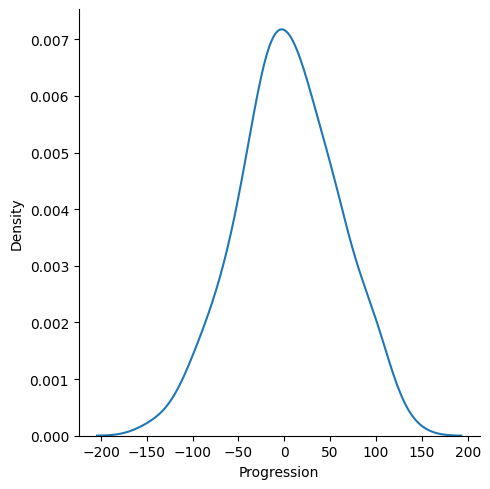

In [29]:
## Plot this residuals 

sns.displot(residuals, kind="kde")

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, pred))
print(mean_squared_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))

42.85111146393169
2870.7675447531806
53.57954408870218


## R square and adjusted R square


Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares


In [31]:
from sklearn.metrics import r2_score
score=r2_score(y_test, pred)
print(score)

0.4682097295337849


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [32]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.42929824632894

## New Data Prediction

In [33]:
#new = diabetes.data[0].reshape(1, -1)

In [ ]:
#new_scaled = scaler.transform(new)

d:\youtube\youtube-projects\diabetesazure\myvenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 10 features, but StandardScaler is expecting 9 features as input.

In [ ]:
#pred_new = regression.predict(new_scaled)

In [ ]:
#pred_new[0]

## Pickling The Model file For Deployment

In [35]:
import pickle

In [38]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [39]:

pickle.dump(scaler,open('scaling.pkl','wb'))

## Test for App 

In [ ]:
from pydantic import BaseModel
import pandas as pd

In [ ]:
scalar = pickle.load(open('scaling.pkl', 'rb'))
regmodel = pickle.load(open('regmodel.pkl', 'rb'))

In [ ]:
class inputvar(BaseModel):
    age: float 
    bmi: float
    bp: float 
    s1: float 
    s2: float 
    s3: float 
    s4: float 
    s5: float 
    s6: float 


In [ ]:
data = {
    "age": 34,
    "bmi": 9,
    "bp": 2,
    "s1": 6,
    "s2": 8,
    "s3": 4,
    "s4": 9,
    "s5": 3,
    "s6": 2
}

In [ ]:
diabeteVar = inputvar(**data)

In [ ]:
diabeteVar

In [ ]:
data = diabeteVar.dict()
data

In [ ]:
data = pd.json_normalize(data)

In [ ]:
data

In [ ]:
data = scalar.transform(data)
data

In [ ]:
predictionvar = regmodel.predict(data)
predictionvar[ 0]

In [ ]:
def prediction(diabeteVar: inputvar):
    data = pd.json_normalize(diabeteVar.dict())
    data = scalar.transform(data)
    predictionvar = regmodel.predict(data)
    return {'prediction': predictionvar[0]}

## test 

In [ ]:
class InputData(BaseModel):
    age: float
    bmi: float
    bp: float
    s1: float
    s2: float
    s3: float
    s4: float
    s5: float
    s6: float

In [ ]:
data = {
    "age": 34,
    "bmi": 9,
    "bp": 2,
    "s1": 6,
    "s2": 8,
    "s3": 4,
    "s4": 9,
    "s5": 3,
    "s6": 2
}

In [ ]:
data = InputData(**data)

In [ ]:
data = [[data.age, data.bmi, data.bp, data.s1, data.s2, data.s3, data.s4, data.s5, data.s6]]

In [ ]:
len(data)

In [ ]:
scaler.transform(data) 

In [ ]:



@app.post("/predict/")
def predict_diabetes(data: InputData):
    input_data = [[data.age, data.sex, data.bmi, data.bp, data.s1, data.s2, data.s3, data.s4, data.s5, data.s6]]
    input_data = scaler.transform(input_data)  # Use the same scaler as in training
    prediction = model.predict(input_data)
    return {"prediction": prediction[0]}